# Visualización de datos

Las librerías más famosas para la visualización de datos en python, son:
* Matplotlib
* Seaborn
* Altair
* Plotly

In [10]:
import numpy as np
import pandas as pd
import altair as alt
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

## Carga de datos

In [37]:
datos = pd.read_csv('../data/Diabetes.csv')
datos['Outcome'] = datos['Outcome'].astype(str)
datos = datos.loc[(datos['BMI'] != 0) & (datos['Glucose'] != 0) & (datos['Age'] != 0)].reset_index(drop=True)

In [38]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 752 entries, 0 to 751
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               752 non-null    int64  
 1   Glucose                   752 non-null    int64  
 2   BloodPressure             752 non-null    int64  
 3   SkinThickness             752 non-null    int64  
 4   Insulin                   752 non-null    int64  
 5   BMI                       752 non-null    float64
 6   DiabetesPedigreeFunction  752 non-null    float64
 7   Age                       752 non-null    int64  
 8   Outcome                   752 non-null    object 
dtypes: float64(2), int64(6), object(1)
memory usage: 53.0+ KB


El método info() de un DataFrame en pandas proporciona un resumen conciso de los datos. En el caso del DataFrame datos que se obtiene de leer el archivo 'Diabetes.csv', las columnas representan lo siguiente:  
1. Pregnancies: Número de veces que la paciente ha estado embarazada.
2. Glucose: Concentración de glucosa en plasma a 2 horas en una prueba oral de tolerancia a la glucosa.
3. BloodPressure: Presión arterial diastólica (mm Hg).
4. SkinThickness: Espesor del pliegue de la piel del tríceps (mm).
5. Insulin: Insulina sérica de 2 horas (mu U/ml).
6. BMI: Índice de masa corporal (peso en kg/(altura en m)^2).
7. DiabetesPedigreeFunction: Función de pedigrí de diabetes, una función que puntúa la probabilidad de diabetes en función de la historia familiar.
8. Age: Edad (años).
9. Outcome: Variable de clase (0 o 1) donde '1' denota que se ha diagnosticado diabetes y '0' denota que no se ha diagnosticado diabetes.

El método info() también proporciona información adicional como el número total de entradas (filas), la cantidad de entradas no nulas para cada columna y el tipo de datos de cada columna.

In [39]:
datos.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [40]:
datos.shape

(752, 9)

In [41]:
np.round((1 + np.log2(datos.shape[0])), 0)

11.0

In [42]:
np.round(np.sqrt(datos.shape[0]), 0)

27.0

## Histograma

Los histogramas son una forma de visualizar la distribución de un conjunto de datos numéricos. Los histogramas muestran la frecuencia de los valores en un conjunto de datos. Los histogramas son útiles para visualizar la distribución de un conjunto de datos y para identificar patrones en los datos. Por ejemplo, se puede visualizar la distribución de la concentración de glucosa en plasma en pacientes diagnosticados con diabetes.

### Altair

In [43]:
alt.Chart(datos).mark_bar().encode(
    alt.X('Glucose:Q', bin=alt.Bin(maxbins=30)),
    y='count()'
).properties(
    title='Glucose distribution in diabetes',
    width = 600
)

alt.Chart(...)

### Seaborn

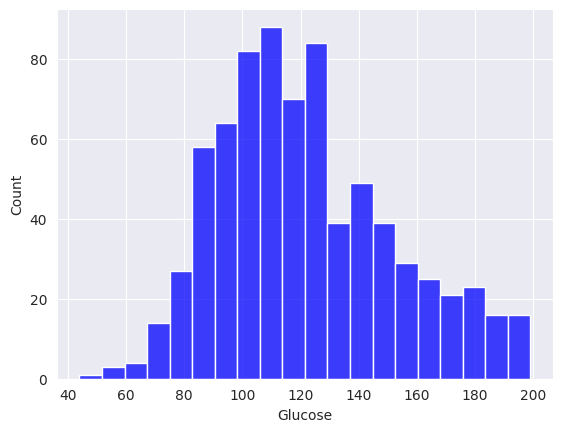

In [44]:
sns.histplot(datos['Glucose'], bins=20, color='blue')
plt.show()

### Plotly

In [45]:
px.histogram(datos, x='Glucose', nbins=30, title='Glucose distribution in diabetes')

## Gráfico de barras

Los gráficos de barras son una forma de visualizar la distribución de un conjunto de datos categóricos. Los gráficos de barras muestran la frecuencia de cada categoría en un conjunto de datos. Los gráficos de barras son útiles para comparar la distribución de un conjunto de datos entre diferentes categorías. Por ejemplo, se puede comparar la frecuencia de pacientes diagnosticados con diabetes y pacientes no diagnosticados con diabetes.

### Altair

In [46]:
alt.Chart(datos).mark_bar(color='blue', size=20).encode(
    x=alt.X('Outcome:N', title=None, axis=alt.Axis(labels=False, ticks=False), scale=alt.Scale(padding=1)),
    y='count()',
    color='Outcome:N'
).properties(
    title='Diabetes frequency',
    width = 400  # Aumenta este valor para hacer las barras más anchas
).configure_view(
    stroke=None
)

alt.Chart(...)

### Seaborn

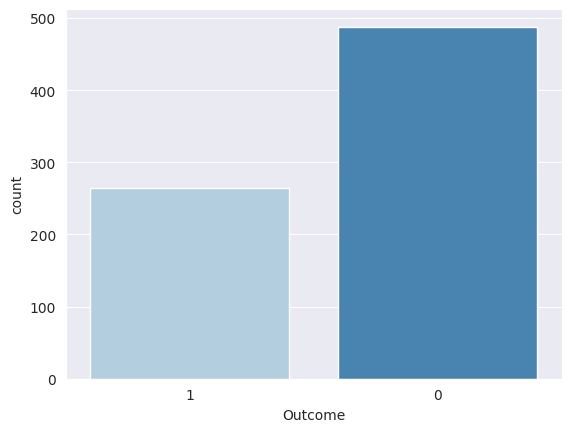

In [47]:
sns.countplot(x='Outcome', data=datos, palette='Blues', hue='Outcome')
plt.show()

### Plotly

In [48]:
px.bar(datos, x='Outcome', title='Diabetes frequency', color='Outcome')

## Gráfico de líneas

Los gráficos de líneas son una forma de visualizar la relación entre dos conjuntos de datos. Los gráficos de líneas muestran los valores de un conjunto de datos en un eje vertical y los valores de otro conjunto de datos en un eje horizontal. Los gráficos de líneas son útiles para visualizar la relación entre dos conjuntos de datos y para identificar patrones en los datos. Por ejemplo, se puede visualizar la relación entre la concentración de glucosa en plasma y la edad.

### Altair

In [49]:
# Calculate the mean of 'Glucose' for each 'Age'
mean_glucose_by_age = datos.groupby('Age')['Glucose'].mean().reset_index()

In [50]:
alt.Chart(mean_glucose_by_age).mark_line().encode(
    x='Age:Q',
    y='Glucose:Q'
).properties(
    title='Glucose by Age',
    width = 400
)

alt.Chart(...)

### Seaborn

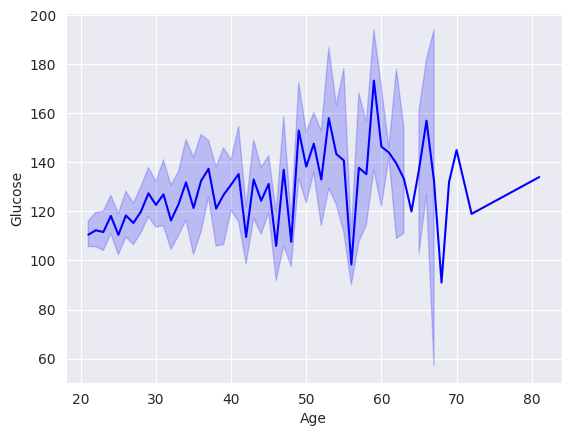

In [51]:
sns.lineplot(x='Age', y='Glucose', data=datos, color='blue')
plt.show()

### Plotly

In [52]:
# Create a line chart
fig = px.line(mean_glucose_by_age, x='Age', y='Glucose', title='Mean Glucose by Age')
fig.show()

## Gráfico de torta

Los gráficos de torta son una forma de visualizar la distribución de un conjunto de datos categóricos. Los gráficos de torta muestran la proporción de cada categoría en un conjunto de datos. Los gráficos de torta son útiles para visualizar la distribución de un conjunto de datos y para comparar la proporción de cada categoría. Por ejemplo, se puede visualizar la proporción de pacientes diagnosticados con diabetes y pacientes no diagnosticados con diabetes.

### Altair

In [30]:
alt.Chart(datos).mark_arc().encode(
    theta='count()',
    color='Outcome:N'
).properties(
    title='Diabetes proportion'
)

alt.Chart(...)

### Seaborn

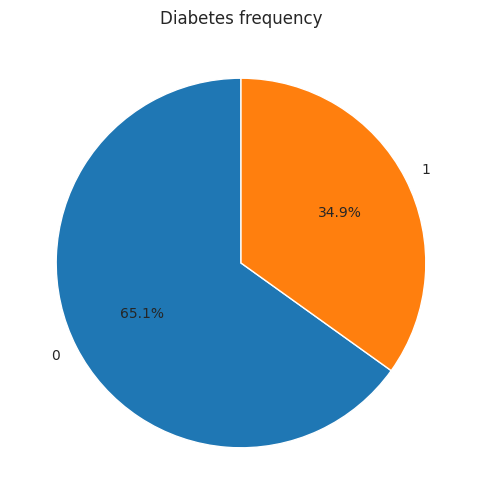

In [31]:
outcome_counts = datos['Outcome'].value_counts()

# Luego, creamos el gráfico de torta
plt.figure(figsize=(6,6))
plt.pie(outcome_counts, labels=outcome_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Diabetes frequency')
plt.show()

### Plotly

In [53]:
px.pie(datos, names='Outcome', title='Diabetes proportion')

## Scatter plot

Un Scatter plot es una gráfica que muestra los valores de dos conjuntos de datos como puntos en un plano. Los datos se muestran en un eje horizontal y en un eje vertical. Los Scatter plots se utilizan para visualizar la relación entre dos conjuntos de datos. En el caso de los datos de diabetes, se puede utilizar un Scatter plot para visualizar la relación entre dos variables. Por ejemplo, se puede visualizar la relación entre la concentración de glucosa en plasma y el índice de masa corporal.

### Altair

In [54]:
alt.Chart(datos).mark_circle().encode(
    x='Glucose',
    y='BMI'
)

alt.Chart(...)

### Seaborn

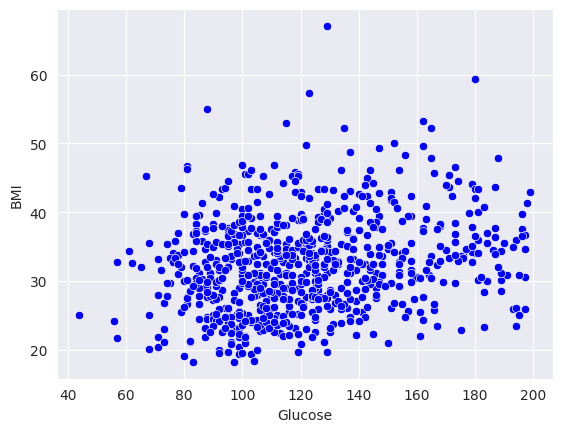

In [56]:
sns.scatterplot(x='Glucose', y='BMI', data=datos, color='blue')
plt.show()

### Plotly

In [57]:
px.scatter(datos, x='Glucose', y='BMI', title='Relation between glucose and BMI')

## Scatter plot con color
Otro aspecto interesante de los Scatter plots es que se pueden colorear los puntos en función de una tercera variable. Por ejemplo, se puede colorear los puntos en función de la variable de clase 'Outcome' que indica si se ha diagnosticado diabetes o no.

### Altair

In [58]:
alt.Chart(datos).mark_point().encode(
    x='Glucose:Q',
    y='Insulin:Q',
    color='Outcome:N'
    ).properties(
    title='Relation between glucose and insulin in diabetes'
    )

alt.Chart(...)

### Seaborn

<Axes: xlabel='Glucose', ylabel='Insulin'>

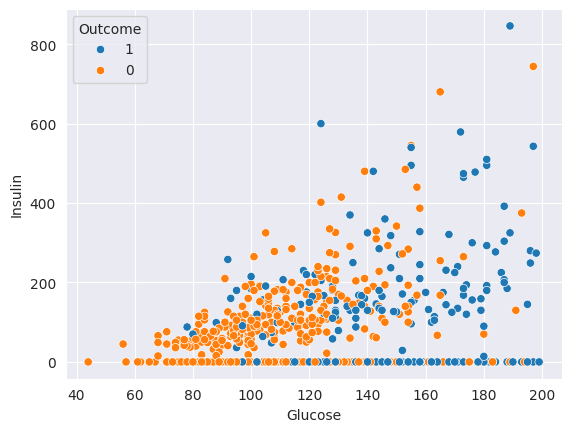

In [59]:
sns.scatterplot(x='Glucose', y='Insulin', data=datos, hue='Outcome')

### Plotly

In [61]:
px.scatter(datos, x='Glucose', y='Insulin', color='Outcome', title='Relation between glucose and insulin in diabetes')

## Diagramas de cajas y bigotes

Los diagramas de cajas y bigotes son una forma de visualizar la distribución de un conjunto de datos. Los diagramas de cajas y bigotes muestran la mediana, los cuartiles y los valores atípicos de un conjunto de datos. Los diagramas de cajas y bigotes son útiles para comparar la distribución de un conjunto de datos entre diferentes categorías. Por ejemplo, se puede comparar la distribución de la concentración de glucosa en plasma entre pacientes diagnosticados con diabetes y pacientes no diagnosticados con diabetes.

Separar los pacientes en cuartiles de edad y comparar la distribución de la concentración de glucosa en plasma entre los diferentes grupos de edad.

In [62]:
datos['Age_group'] = pd.qcut(datos['Age'], q=4).astype(str)

### Altair

In [63]:
alt.Chart(datos).mark_boxplot(ticks = True).encode(
    x=alt.X('Outcome:O', title=None, axis=alt.Axis(labels=False, ticks=False), scale=alt.Scale(padding=1)), 
    y='Glucose:Q',
    color='Outcome:O',
    column=alt.Column('Age_group:N', header=alt.Header(orient='bottom'))
    ).properties(
    title='Glucose by Age quartiles and diabetes',
    width = 100).configure_facet(
    spacing=0).configure_view(
    stroke=None)

alt.Chart(...)

### Seaborn

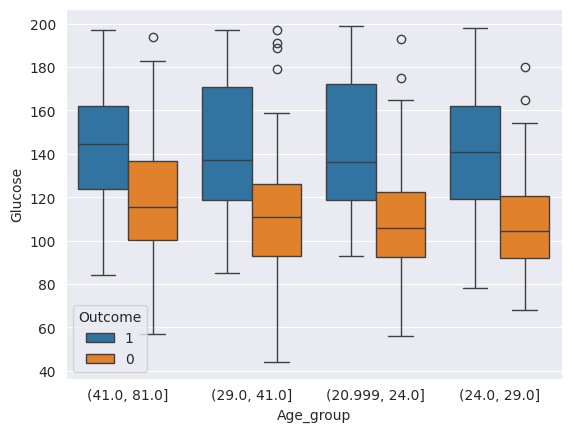

In [66]:
sns.boxplot(x='Age_group', y='Glucose', data=datos, hue='Outcome')
plt.show()

### Plotly

In [67]:
px.box(datos, x='Outcome', y='Glucose', color='Outcome', facet_col='Age_group', title='Glucose by Age quartiles and diabetes')

## Gráfico de violín

El gráfico de violín es una forma de visualizar la distribución de un conjunto de datos. Los gráficos de violín son similares a los diagramas de cajas y bigotes, pero proporcionan una visualización más detallada de la distribución de los datos. Los gráficos de violín muestran la distribución de los datos en función de una variable categórica. Por ejemplo, se puede visualizar la distribución de la concentración de glucosa en plasma en función de la variable de clase 'Outcome' que indica si se ha diagnosticado diabetes o no.

### Altair

In [72]:
boxplot = alt.Chart(datos).mark_boxplot(color='black').encode(
    alt.Y('Glucose:Q')).properties(width=170)

violin = alt.Chart(datos).transform_density(
    'Glucose',
    as_=['Glucose', 'density'],
    groupby=['Age_group']).mark_area(orient='horizontal').encode(
    y='Glucose:Q',
    color='Age_group:N',
    x=alt.X(
        'density:Q',
        stack='center',
        impute=None,
        title=None,
                scale=alt.Scale(nice=False,zero=False),
        axis=alt.Axis(labels=False, values=[0], grid=False, ticks=True),
    ),)
alt.layer(violin, boxplot, data=datos).facet(column='Age_group:N').resolve_scale(
    x=alt.ResolveMode("independent")).configure_facet(
    spacing=0)

alt.FacetChart(...)

### Seaborn

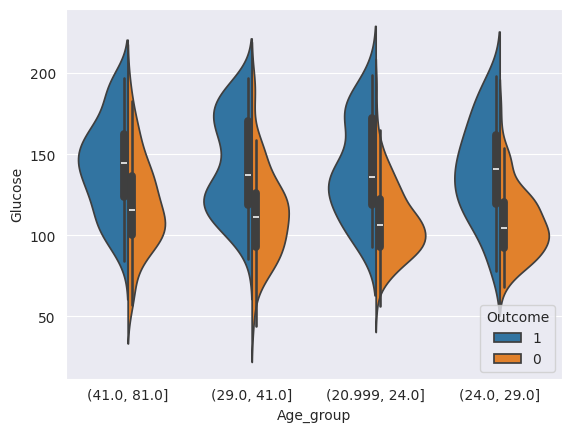

In [71]:
sns.violinplot(x='Age_group', y='Glucose', data=datos, hue='Outcome', split=True) #Cambiar Split a True
plt.show()

### Plotly

In [73]:
px.violin(datos, x='Age_group', y='Glucose', color='Outcome', title='Insulin by Age quartiles and diabetes')

## Mapa de calor

Los mapas de calor son una forma de visualizar la relación entre dos conjuntos de datos. Los mapas de calor muestran la relación entre dos conjuntos de datos en forma de colores. Los mapas de calor son útiles para visualizar la relación entre dos conjuntos de datos y para identificar patrones en los datos. Por ejemplo, se puede visualizar la relación entre las diferentes variables en el conjunto de datos de diabetes.

In [76]:
numeric_columns = [x for x in datos.columns if (datos[x].dtype =='float64') | (datos[x].dtype =='int64')]
datos_corr = datos[numeric_columns].corr()

### Altair

In [77]:
alt.Chart(datos_corr.reset_index().melt('index')).mark_rect().encode(
    x='index:O',
    y='variable:O',
    color='value:Q'
).properties(
    title='Correlation heatmap',
    width = 400
)

alt.Chart(...)

### Seaborn

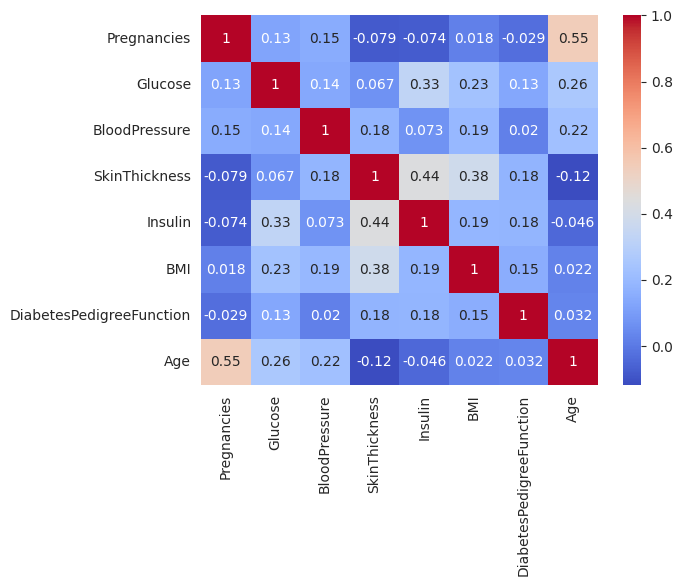

In [78]:
sns.heatmap(datos_corr, cmap='coolwarm', annot=True)
plt.show()

### Plotly

In [52]:
px.imshow(datos_corr, title='Correlation heatmap')

## Gráfico de burbujas

Los gráficos de burbujas son una forma de visualizar la relación entre tres conjuntos de datos. Los gráficos de burbujas muestran los valores de dos conjuntos de datos como puntos en un plano y el tamaño de los puntos como una tercera variable. Los gráficos de burbujas son útiles para visualizar la relación entre tres conjuntos de datos y para identificar patrones en los datos. Por ejemplo, se puede visualizar la relación entre la concentración de glucosa en plasma, el índice de masa corporal y la edad.

### Altair

In [53]:
alt.Chart(datos).mark_circle().encode(
    x='Age',
    y='BMI',
    size='Glucose'
)

alt.Chart(...)

### Seaborn

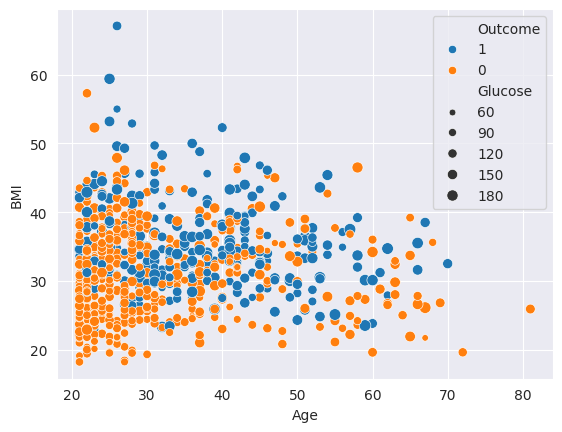

In [80]:
sns.scatterplot(x='Age', y='BMI', size='Glucose', hue = 'Outcome', data=datos, color='blue')
plt.show()

### Plotly

In [82]:
px.scatter(datos, x='Age', y='BMI', size='Glucose', color='Outcome', title='Relation between glucose, BMI and Age')

## Reto

Realizar un análisis visual de la base de datos hotel-booking-demand que se encuentra en kaggle. La base de datos contiene información sobre reservas de hoteles, incluyendo la duración de la estancia, el número de adultos, niños y bebés, el tipo de habitación, el país de origen, entre otros. Realice los gráficos que crea convenientes y que puedan responder a preguntas de negocio. Puede utilizar una librería o más.